In [146]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

# Read Dataset

In [50]:
df = pd.read_csv("./data/train.csv", index_col="ID", parse_dates=["Date"])
df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


# Define Goals

- Business metric apa yang ingin di improve
- Mengapa business metric tersebut perlu di improve
- Bagaimana cara meningkatkan performa bisnis metric tersebut? 

# Problem Statement

- Tentukan mana yang dependent dan independent variable
- Apa saja yang menentukan nilai dan pengaruhnya terhadap dependent variable
- Bagaimana hubungan antara independent-fependent variable, independent-independent variable

# Objective

- Melakukan analisa deskriptif -> menjelaskan apa yang sedang terjadi saat ini
    - number of order per day
    - total revenue sampai saat ini
    - max revenue yang pernah dicapai
    - total store
- Melakukan analisa diagnostic -> mencari akar dari permasalahan
    - Mencari hubungan antara dependent dan independent variable
- Melakukan analisa predictive -> berdasarkan data historical, mengetahui apa yang kira2 terjadi kedepan
    - Menentukan seberapa kuat hubungan antar variable (independent-dependent, independent-independent)
- Melakukan analisa prescriptive -> rekomendasi bisnis kedepannya seperti apa
    - Membangun model dan menjelaskan bagaimana model tersebut bekerja dengan variable yang diberikan
    - Seberapa jauh data atau model dapat meningkatkan performa dari business metric

# Analytics

- Dependent variable
    - order (number)
    - sales (number)
- Independent variable
    - discount (categoric)
    - holiday (categoric)
    - date (date)
    - region code (categoric)
    - location type (categoric)
    - store type (categoric)

## Descriptive

- Number
    - sum, max, min value
    - check disbtribution -> normal or skew?
- Categoric
    - check distribution
- Date
    - dependent variable performance per day / per week / per month

In [51]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


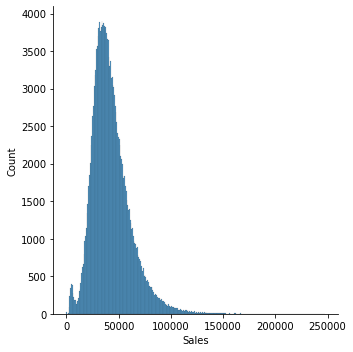

In [52]:
sns.displot(df["Sales"]);

In [53]:
df_group = df.groupby("Date").agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["date", "sales_max", "sales_min", "sales_sum"]
df_group.head()

,date,sales_max,sales_min,sales_sum
0,2018-01-01,126633.0,7011.84,15345484.5
1,2018-01-02,132699.0,23148.00,19592415.0
2,2018-01-03,142662.0,21501.00,18652527.0
3,2018-01-04,145242.0,21399.00,19956267.0
4,2018-01-05,155727.0,25713.00,22902651.0


In [54]:
fig = px.line(df_group, x='date', y='sales_sum', markers=True)
fig.show()

## Diagnostic

In [55]:
df_group = df.groupby(["Date", "Holiday"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["date", "holiday", "sales_max", "sales_min", "sales_sum"]
df_group.head()

,date,holiday,sales_max,sales_min,sales_sum
0,2018-01-01,1,126633.0,7011.84,15345484.5
1,2018-01-02,0,132699.0,23148.00,19592415.0
2,2018-01-03,0,142662.0,21501.00,18652527.0
3,2018-01-04,0,145242.0,21399.00,19956267.0
4,2018-01-05,0,155727.0,25713.00,22902651.0


In [56]:
fig = px.line(df_group, x='date', y='sales_sum', color="holiday")
fig.show()

In [57]:
fig = px.bar(df_group, x='date', y='sales_sum', color="holiday")
fig.show()

In [58]:
df_group = df.groupby(["Date", "Discount"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["date", "discount", "sales_max", "sales_min", "sales_sum"]
df_group.head()

,date,discount,sales_max,sales_min,sales_sum
0,2018-01-01,Yes,126633.0,7011.84,15345484.5
1,2018-01-02,Yes,132699.0,23148.00,19592415.0
2,2018-01-03,Yes,142662.0,21501.00,18652527.0
3,2018-01-04,No,21399.0,21399.00,21399.0
4,2018-01-04,Yes,145242.0,24435.00,19934868.0


In [59]:
fig = px.bar(df_group, x='date', y='sales_sum',
              color='discount',
              height=400)
fig.show()

## Playing with Date Data

In [113]:
df_extract = df.copy()
df_extract["month_name"] = df_extract.Date.dt.month_name()
df_extract["month"] = df_extract.Date.dt.month
df_extract["year"] = df_extract.Date.dt.year
df_extract["day"] = df_extract.Date.dt.dayofweek
df_extract["day_name"] = df_extract.Date.dt.day_name()
df_extract["is_weekend"] = df_extract["day_name"].apply(lambda x: x in ["Saturday", "Sunday"])
df_extract.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month_name,month,year,day,day_name,is_weekend
ID,,,,,,,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,January,1,2018,0,Monday,False
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,January,1,2018,0,Monday,False
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,January,1,2018,0,Monday,False
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,January,1,2018,0,Monday,False
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,January,1,2018,0,Monday,False


In [103]:
df_group = df_extract.groupby(["year", "month", "month_name", "Discount"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["year", "month", "month_name", "discount", "sales_max", "sales_min", "sales_sum"]
df_group["date"] = df_group.apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
df_group.head()

,year,month,month_name,discount,sales_max,sales_min,sales_sum,date
0,2018,1,January,No,160527.0,4591.62,2.288481e+08,2018-1
1,2018,1,January,Yes,185184.0,7011.84,2.778177e+08,2018-1
2,2018,2,February,No,115374.0,3957.00,2.425085e+08,2018-2
3,2018,2,February,Yes,141816.0,17430.00,1.750805e+08,2018-2
4,2018,3,March,No,117864.0,0.00,1.912821e+08,2018-3


In [104]:
fig = px.bar(df_group, x='date', y='sales_sum', color="discount",
              height=400)
fig.show()

In [114]:
df_group = df_extract.groupby(["year", "month", "month_name", "day", "day_name"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["year", "month", "month_name", "day", "day_name", "sales_max", "sales_min", "sales_sum"]
df_group["date"] = df_group.apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
df_group.head()

,year,month,month_name,day,day_name,sales_max,sales_min,sales_sum,date
0,2018,1,January,0,Monday,149316.0,7011.84,85124087.46,2018-1
1,2018,1,January,1,Tuesday,160527.0,4638.00,76183236.00,2018-1
2,2018,1,January,2,Wednesday,142662.0,4591.62,75192811.89,2018-1
3,2018,1,January,3,Thursday,145242.0,6468.00,63280326.00,2018-1
4,2018,1,January,4,Friday,155727.0,7548.00,59435230.14,2018-1


In [115]:
fig = px.bar(df_group, x='date', y='sales_sum', color="day_name",
              height=400)
fig.show()

## Other Categoric Variable

In [116]:
df_extract.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month_name,month,year,day,day_name,is_weekend
ID,,,,,,,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,January,1,2018,0,Monday,False
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,January,1,2018,0,Monday,False
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,January,1,2018,0,Monday,False
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,January,1,2018,0,Monday,False
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,January,1,2018,0,Monday,False


In [137]:
df_group = df_extract.groupby(["year", "month", "month_name", "Region_Code"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["year", "month", "month_name", "region_code", "sales_max", "sales_min", "sales_sum"]
df_group["date"] = df_group.apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
df_group.head()

,year,month,month_name,region_code,sales_max,sales_min,sales_sum,date
0,2018,1,January,R1,185184.0,4591.62,1.828422e+08,2018-1
1,2018,1,January,R2,132543.0,9497.88,1.395027e+08,2018-1
2,2018,1,January,R3,128712.0,10687.68,1.176274e+08,2018-1
3,2018,1,January,R4,160527.0,8308.05,6.669353e+07,2018-1
4,2018,2,February,R1,141816.0,3957.00,1.518293e+08,2018-2


In [138]:
fig = px.bar(df_group, x='date', y='sales_sum', color="region_code",
              height=400)
fig.show()

In [139]:
df_group = df_extract.groupby(["year", "month", "month_name", "Region_Code"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["year", "month", "month_name", "region_code", "sales_max", "sales_min", "sales_sum"]
df_group["date"] = df_group.apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
df_group["sales_sum_percentage"] = df_group["sales_sum"] / df_group.groupby('date')['sales_sum'].transform('sum')
df_group.head()

,year,month,month_name,region_code,sales_max,sales_min,sales_sum,date,sales_sum_percentage
0,2018,1,January,R1,185184.0,4591.62,1.828422e+08,2018-1,0.360873
1,2018,1,January,R2,132543.0,9497.88,1.395027e+08,2018-1,0.275335
2,2018,1,January,R3,128712.0,10687.68,1.176274e+08,2018-1,0.232160
3,2018,1,January,R4,160527.0,8308.05,6.669353e+07,2018-1,0.131632
4,2018,2,February,R1,141816.0,3957.00,1.518293e+08,2018-2,0.363585


In [140]:
fig = px.bar(df_group, x='date', y='sales_sum_percentage', color="region_code",
              height=400)
fig.show()

In [144]:
df_group = df_extract.groupby(["year", "month", "month_name", "Store_Type"]).agg({
    "Sales": ["max", "min", "sum"]
}).reset_index()
df_group.columns = ["year", "month", "month_name", "store_type", "sales_max", "sales_min", "sales_sum"]
df_group["date"] = df_group.apply(lambda x: f"{x['year']}-{x['month']}", axis=1)
df_group["sales_sum_percentage"] = df_group["sales_sum"] / df_group.groupby('date')['sales_sum'].transform('sum')
fig = px.bar(df_group, x='date', y='sales_sum_percentage', color="store_type",
              height=400)
fig.show()

## Predictive & Prescriptive

- Membangun model
- Menghitung seberapa kuat variable prediktor terhadap target

### Menghitung Korelasi

- numeric vs numeric
- categoric vs categoric
- numeric vs categoric
- categoric vs numeric

In [148]:
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
scipy.stats.pearsonr(x, y), scipy.stats.spearmanr(x, y)

((0.758640289091187, 0.010964341301680813),
 SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06))

In [150]:
df_extract.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month_name,month,year,day,day_name,is_weekend
ID,,,,,,,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,January,1,2018,0,Monday,False
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,January,1,2018,0,Monday,False
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,January,1,2018,0,Monday,False
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,January,1,2018,0,Monday,False
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,January,1,2018,0,Monday,False


In [230]:
df_extract_corr = df_extract.copy()
df_extract_corr["Discount"] =df_extract_corr["Discount"].apply(lambda x: 1 if x == "Yes" else 0)

In [231]:
spearmans = []
pearsons = []
correlation_columns = ["Sales", "#Order", "Holiday", "Discount", "month"]
for feat_1 in correlation_columns:
    spearmans_temp = []
    pearsons_temp = []
    for feat_2 in correlation_columns:
        spearman = scipy.stats.spearmanr(df_extract_corr[feat_1], df_extract_corr[feat_2])[0]
        pearson = scipy.stats.pearsonr(df_extract_corr[feat_1], df_extract_corr[feat_2])[0]
        spearmans_temp.append(spearman)
        pearsons_temp.append(pearson)
    spearmans.append(spearmans_temp)
    pearsons.append(pearsons_temp)
df_spearmans = pd.DataFrame(spearmans, columns=correlation_columns, index=correlation_columns)
df_pearsons = pd.DataFrame(pearsons, columns=correlation_columns, index=correlation_columns)

In [232]:
fig = px.imshow(df_pearsons, text_auto=True, title="Pearson Correlation")
fig.show()

In [233]:
fig = px.imshow(df_spearmans, text_auto=True, title="Spearman Correlation")
fig.show()

In [194]:
from scipy.stats.contingency import association
obs4x2 = np.array([[1, 1], [2, 2], [2, 2], [5, 5]])

association(obs4x2, method="cramer")

0.0

In [223]:
from pandas import factorize

df_extract_corr = df_extract.copy()
for col in ["Store_Type", "Location_Type", "Region_Code"]:
    labels, categories = factorize(df_extract_corr[col])
    df_extract_corr[col] = labels + 1

In [225]:
cramers = []
correlation_columns = ["Store_Type", "Location_Type", "Region_Code"]
for feat_1 in correlation_columns:
    cramers_temp = []
    for feat_2 in correlation_columns:
        X2 = stats.chi2_contingency(df_extract_corr[[feat_1, feat_2]].to_numpy(), correction=False)[0]
        N = np.sum(len(df_extract_corr))
        minimum_dimension = min(df_extract_corr.shape)-1
        result = np.sqrt((X2/N) / minimum_dimension)
        cramers_temp.append(result)
    cramers.append(cramers_temp)
df_cramers = pd.DataFrame(cramers, columns=correlation_columns, index=correlation_columns)

In [226]:
fig = px.imshow(df_cramers, text_auto=True, title="Cramers Association")
fig.show()